In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/ipykernel_37634/1000570959.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [2]:
import pandas as pd

In [5]:
# # Flip Flop with problem size 7
problem_ffp_tiny = mh.FlipFlopGenerator().generate(seed=0, size=7)
#state = problem_ffp.get_state()

In [6]:
# GABF runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GABFRunner(problem=problem_ffp_tiny,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[3, 5], # 20 bits in total
              mutation_rates=[0.4, 0.5]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [7]:
df_run_curves_ffp.shape

(8, 7)

In [8]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001131,2.0,0.0,3,0.4,2048
1,1,0.011030,6.0,2.0,3,0.4,2048
2,0,0.001131,2.0,0.0,3,0.5,2048
3,1,0.011030,6.0,2.0,3,0.5,2048
4,0,0.001131,2.0,0.0,5,0.4,2048


In [9]:
df_run_curves_ffp['Fitness'].max()

6.0

In [10]:
# need to check Time and FEvals

In [11]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [12]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [13]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1,1,0.01103,6.0,2.0,3,0.4,2048
3,1,0.01103,6.0,2.0,3,0.5,2048
5,1,0.01103,6.0,2.0,5,0.4,2048
7,1,0.01103,6.0,2.0,5,0.5,2048


In [14]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,3,0.4,2.0,1.0,0.01103
1,3,0.5,2.0,1.0,0.01103
2,5,0.4,2.0,1.0,0.01103
3,5,0.5,2.0,1.0,0.01103


In [39]:
# all results are the same. Take (5, 0.4)

In [15]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001131,2.0,0.0,3,0.4,2048
1,1,0.011030,6.0,2.0,3,0.4,2048
2,0,0.001131,2.0,0.0,3,0.5,2048
3,1,0.011030,6.0,2.0,3,0.5,2048
4,0,0.001131,2.0,0.0,5,0.4,2048


In [16]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [17]:
# GABF runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GABFRunner(problem=problem_ffp_tiny,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[5],
              mutation_rates=[0.4])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    #print("number of rows")
    #print(df_run_curves_ffp_sub.shape)
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])
    #print("after concatenation")
    #print(df_iter_curves_ffp.shape)

(2, 7)
(15, 7)
(51, 7)
(58, 7)
(78, 7)
(97, 7)
(110, 7)
(112, 7)
(118, 7)
(136, 7)


In [18]:
#df_iter_curves_ffp.to_csv('gabf-flip-flop-ps7.csv')

In [3]:
df_iter_curves_ffp = pd.read_csv('../../csv-files/gabf-flip-flop-ps7.csv')

In [19]:
df_iter_curves_ffp.Iteration.max()

35

In [4]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [21]:
df_fitness_iter_ffp.shape

(36, 3)

In [22]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,2.90,0.544444
1,1,4.70,0.900000
2,2,4.50,0.571429
3,3,4.50,0.571429
4,4,4.75,0.214286


In [23]:
df_iter_curves_ffp.Fitness.max()

6.0

In [24]:
# semi - converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()-1].Iteration.min()

6

In [28]:
#convergence point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

35

In [5]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [6]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness > 0]

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,2.900000,0.544444,0.737865
1,1,4.700000,0.900000,0.948683
2,2,4.500000,0.571429,0.755929
3,3,4.500000,0.571429,0.755929
4,4,4.750000,0.214286,0.462910
5,5,4.875000,0.410714,0.640870
6,6,5.000000,0.333333,0.577350
12,12,5.333333,0.266667,0.516398
17,17,5.250000,0.250000,0.500000
18,18,5.333333,0.333333,0.577350


In [7]:
np.mean(df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness > 0].stddev_fitness)

0.6527628246243725

In [26]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,2.90,0.544444,0.737865
1,1,4.70,0.900000,0.948683
2,2,4.50,0.571429,0.755929
3,3,4.50,0.571429,0.755929
4,4,4.75,0.214286,0.462910


Text(0, 0.5, 'Fitness')

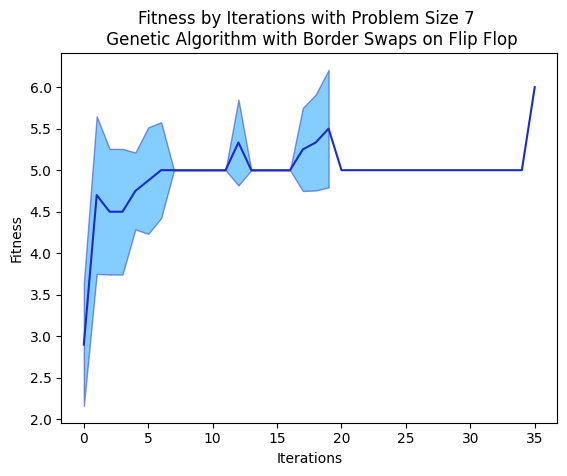

In [27]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Fitness by Iterations with Problem Size 7 \n Genetic Algorithm with Border Swaps on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [71]:
# Fevals - iteration

In [8]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [30]:
df_FEvals_iter_ffp.shape

(36, 3)

In [31]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.000,0.000000
1,1,1.800,0.177778
2,2,2.875,0.410714
3,3,3.875,0.410714
4,4,5.125,0.410714


In [32]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [33]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 1.154700538379251)

In [34]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.000,0.000000,0.000000
1,1,1.800,0.177778,0.421637
2,2,2.875,0.410714,0.640870
3,3,3.875,0.410714,0.640870
4,4,5.125,0.410714,0.640870


In [9]:
df_FEvals_iter_ffp.avg_FEvals.max()

37.0

In [10]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.Iteration == 35]

,Iteration,avg_FEvals,var_FEvals
35,35,37.0,NaN


Text(0, 0.5, 'FEvals')

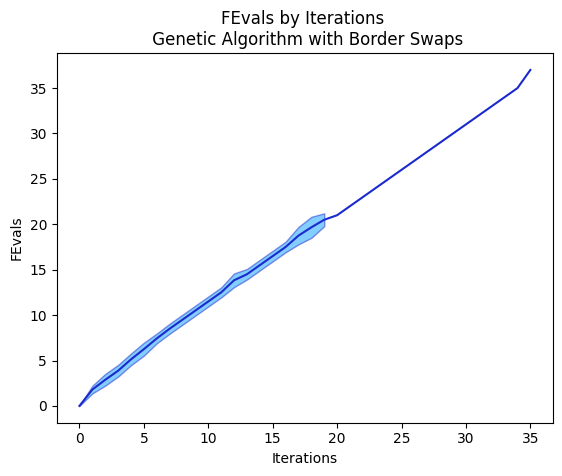

In [35]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [36]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == 0]['Iteration']

0    0
Name: Iteration, dtype: int64

In [37]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals.isna()]['Iteration'].min()

20

In [64]:
# fitness - wall clock time

In [13]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [39]:
df_time_iter_ffp.shape

(36, 3)

In [40]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000483,9.252848e-08
1,1,0.004931,2.556649e-06
2,2,0.009492,5.743888e-06
3,3,0.014246,3.759503e-06
4,4,0.015037,3.856802e-06


In [14]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [42]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000483,9.252848e-08,0.000304
1,1,0.004931,2.556649e-06,0.001599
2,2,0.009492,5.743888e-06,0.002397
3,3,0.014246,3.759503e-06,0.001939
4,4,0.015037,3.856802e-06,0.001964


In [43]:
df_time_iter_ffp.stddev_time.max()

0.002626721719381991

Text(0, 0.5, 'Time')

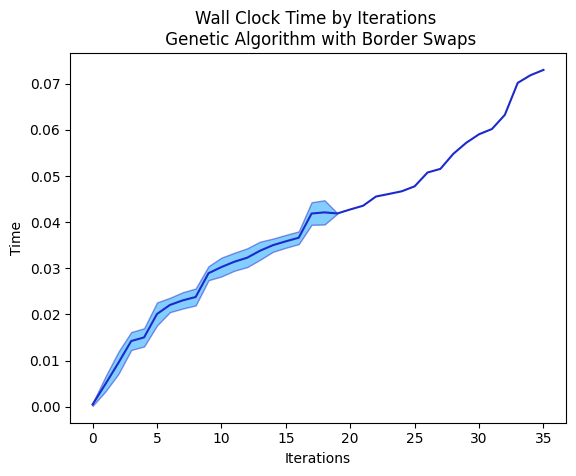

In [44]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [45]:
df_time_iter_ffp.avg_time.max()

0.07301538600586355

In [15]:
df_time_iter_ffp.stddev_time.min(), df_time_iter_ffp.stddev_time.max(), np.mean(df_time_iter_ffp.stddev_time)

(4.133321677124213e-05, 0.0026267217193819796, 0.001730158223148251)

In [46]:
df_time_iter_ffp[df_time_iter_ffp.var_time.isna()].Iteration.min()

20

In [47]:
df_iter_curves_ffp[df_iter_curves_ffp.Iteration == 20]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
20,20,0.042767,5.0,21.0,5,0.4,2048


In [48]:
df_iter_curves_ffp[df_iter_curves_ffp.Iteration == 35]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
35,35,0.073015,6.0,37.0,5,0.4,2048


In [49]:
df_iter_curves_ffp.groupby(['Iteration']).size().reset_index(name='counts') # 20 => 1 iter

,Iteration,counts
0,0,10
1,1,10
2,2,8
3,3,8
4,4,8
5,5,8
6,6,7
7,7,6
8,8,6
9,9,6
